# Task 1: Upload and clean the data
The goal of this task is threefold:


1. we want to reduce the noise in the original raw text by removing everything that does not bring information to the language model. everything that is not exactly text: html tags, math equations, urls, etc
2. we want to prepare the corpus and make it ready for our language model by tokenizing the text.
3. And finally, we want to remove rows with short or very long texts. As you will see, some of the entries are mostly made of large numerical tables. Entries that are too long will not be good reflection of the corpus. Entris that are too short will not bring relevant information to the language model either.



In [ ]:
!pip install unidecode # The Unidecode library itself is used to convert Unicode text to plain ASCII characters.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
# We only need the following librairies

import pandas as pd
import re
import string
import csv
from unidecode import unidecode

Let's load the dataset and shuffle it.

In [ ]:
data = pd.read_csv('https://lp-prod-resources.s3.amazonaws.com/116/other/stackexchange_812k.csv.gz', compression='gzip').sample(frac = 1, random_state = 0).reset_index(drop = True)

In [ ]:
assert data.shape == (812132, 5), "The dataset does not have the right dimensions"

And start by exploring the dataset.

In [ ]:
data.head()

,post_id,parent_id,comment_id,text,category
0,291254,NaN,601672.0,The condition makes the gradient unbiased. (it...,comment
1,115372,NaN,221284.0,"Yes, that sounds fine to me.",comment
2,327356,NaN,NaN,<p>Consider gaussian variables belonging to a ...,post
3,186923,NaN,355055.0,Thanks S. Catterall. ^-^ Integrability: I knew...,comment
4,433143,NaN,NaN,Feature with very few extreme values,title


We have 3 types of text:

In [ ]:
data.category.value_counts()

,count
category,
comment,553076
post,167304
title,91752


In [ ]:
# example of titles
for p in data[data.category == 'title'].text.sample(3).values:
  print('-' * 20)
  print(p)

--------------------
Diebold-Mariano test for predictive accuracy
--------------------
correlated measurement error in variables
--------------------
Implementing Predictive Posterior Distribution Using Stan


We see that posts text have html tags and latex formatted equations.

In [ ]:
for p in data[data.category == 'post'].text.sample(3).values:
  print('-' * 20)
  print(p)

--------------------
<p>How do <a href="https://stats.stackexchange.com/questions/14474/compendium-of-cross-validation-techniques">different cross-validation</a> methods compare in terms of model variance and bias? </p>

<p>My question is partly motivated by this thread: <a href="https://stats.stackexchange.com/questions/61546">Optimal number of folds in $K$-fold cross-validation: is leave-one-out CV always the best choice?</a>. The answer there suggests that models learned with leave-one-out cross-validation have <strong>higher variance</strong> than those learned with regular $K$-fold cross-validation, making leave-one-out CV a worse choice.</p>

<p>However, my intuition tells me that in leave-one-out CV one should see relatively lower variance between models than in the $K$-fold CV, since we are only shifting one data point across folds and therefore the training sets between folds overlap substantially.</p>

<p>Or going in the other direction, if $K$ is low in the $K$-fold CV, the 

In [ ]:
# And here's a sample of comments
for p in data[data.category == 'comment'].text.sample(3).values:
  print('-' * 20)
  print(p)

--------------------
Not sure, but https://www.sciencedirect.com/science/article/pii/S0047259X15000512 and the MATLAB code at https://www.mathworks.com/matlabcentral/fileexchange/56592-supervised-dimension-reduction?focused=6196200&tab=function may be of interest.
--------------------
an absolutely phenomenal response and prompt too.  thank you one and all for looking into this for me.
--------------------
@IrishStat - yes, assume, assume, assume.  But you could relax some assumptions too, just change the code in the lm.shift function some.  I should have spelled out all the assumptions, true  (+1).


# Clean up raw text

1. Convert NonAscii characters to their Ascii counterparts
2. We're going to remove the following elements:
  * html tags
  * line returns
  * urls
  * latex equations
  * numbers
  * mentions: @someone
  * digits
  * most of the punctuation
  * and extra spaces



For that we will use a series of simple regex patterns and the following pandas dataframe pattern:

```
pattern = r" some regex pattern"
df.text.apply(lambda t : re.sub(pattern,' ', t) )
```

Note that it's up to you to decide which elements should be removed or kept. This sequence of transformations can be modified.

Not also that the regex patterns we use here are chosen for their simplicity. Feel free to use more precise patterns.  





In [ ]:
#Convert NonAscii characters to their Ascii counterparts
data['text'] = data.text.apply(lambda t : unidecode(t) )

In [ ]:
# remove html tags
data['text'] = data.text.apply(lambda t : re.sub("<[^>]*>",' ', t) )

In [ ]:
# remove line returns
data['text'] = data.text.apply(lambda t : re.sub("[\r\n]+",' ', t) )


In [ ]:
# remove urls
data['text'] = data.text.apply(lambda t : re.sub("http\S+",' ', t) )
data['text'] = data.text.apply(lambda t : re.sub("http\S+",' ', t) )


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-3541449220.py:2: SyntaxWarning: invalid escape sequence '\S'
  data['text'] = data.text.apply(lambda t : re.sub("http\S+",' ', t) )
/tmp/ipython-input-3541449220.py:3: SyntaxWarning: invalid escape sequence '\S'
  data['text'] = data.text.apply(lambda t : re.sub("http\S+",' ', t) )


In [ ]:
# remove mentions
data['text'] = data.text.apply(lambda t : re.sub("@\S+",' ', t) )


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-2403395789.py:2: SyntaxWarning: invalid escape sequence '\S'
  data['text'] = data.text.apply(lambda t : re.sub("@\S+",' ', t) )


In [ ]:
# remove latex
data['text'] = data.text.apply(lambda t : re.sub("\$[^>]*\$",' ', t) )


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1076458036.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['text'] = data.text.apply(lambda t : re.sub("\$[^>]*\$",' ', t) )


In [ ]:
# remove digits
data['text'] = data.text.apply(lambda t : re.sub("\d+",' ', t) )


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4030371069.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['text'] = data.text.apply(lambda t : re.sub("\d+",' ', t) )


In [ ]:
# remove some of the punctuation but keep ,.!? and -
remove = '"#$%&()*+/:;<=>@[\\]^_`{|}~”“'
pattern = r"[{}]".format(remove)
data['text'] = data.text.apply(lambda t : re.sub(pattern,' ', t) )


In [ ]:
# remove multiple spaces
data['text'] = data.text.apply(lambda t : re.sub("\s\s+",' ', t) )


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3272314715.py:2: SyntaxWarning: invalid escape sequence '\s'
  data['text'] = data.text.apply(lambda t : re.sub("\s\s+",' ', t) )


In [ ]:
# remove trailing spaces with strip()
data['text'] = data.text.apply(lambda t : t.strip() )


Let's check out the resulting text for the different types:

In [ ]:
# titles should not be changed
for p in data[data.category == 'title'].text.sample(3).values:
  print('-' * 20)
  print(p)

--------------------
Help understanding an explanation about minimum description length principle
--------------------
Do image recognition efforts always rely on machine learning and statistics?
--------------------
Is there a Correlation metric for Categorical vs Numerical features?


In [ ]:
# posts should have much less clutter
for p in data[data.category == 'post'].text.sample(3).values:
  print('-' * 20)
  print(p)

--------------------
BEGINNING I want to ask a few soft questions about statistics. I understand that maybe probably some all off these questions cannot be answered categorically but I would like to try and get some informed opinions on them anyway. I want to learn some practical statistics and that I could apply to actual problems data sets e.g. Forecasting the outcome of a sporting event or election or back-testing designing some kind of strategy . MIDDLE I'm almost finished an undergraduate degree in Mathematics and Economics and I just don't feel equipped to actually do anything particularly impressive useful reliable with what I've learnt. I have taken all the usual statistics modules in, for example, Classical Inference, Bayesian Inference, Econometrics basically a course on regression , Generalized Linear Models and could understand most everything I did to a level that was more than sufficient for exams, but I still don't feel I'd know or be able implement what's most important

In [ ]:
# comments should also be less noisy
for p in data[data.category == 'comment'].text.sample(3).values:
  print('-' * 20)
  print(p)

--------------------
The loss is not evaluated on the link scale. This discussion is not the right place for me to offer you a tutorial on GLMs -- I refer you instead to my book on GLMs which Springer will publish in about a month. Nor is this discussion the right place for you to offer an alternative answer to the original question. Write a proper answer if you want to do that.
--------------------
Thanks for answering. My data is extremely skewed and it is a concern, as you say, for t-tests. What to do in this case?
--------------------
I think the geometric intuition is clever, but how would one solve this analytically? Specifically, solving for the argmax with our given constraint seems like it could yield any number of forms, and not necessarily the one we are trying to prove.


# Tokenize

Let's tokenize the text.
This will allow us to count the number of tokens of each text and subsequently remove test that are too long or too short.
You can use other librairies to tokenize the text (spacy for instance) or other tokenizer. Here we use the [WordPunctTokenizer](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.regexp.WordPunctTokenizer) from NLTK.

And we create a new columns called tokens




In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
data['tokens'] = data.text.apply(lambda t : tokenizer.tokenize(t.lower()))


Let's now count the tokens in each piece of text


In [ ]:
data['n_tokens'] = data.tokens.apply(len)

In [ ]:
data.n_tokens.describe()

,n_tokens
count,812132.000000
mean,60.065993
std,99.396370
min,0.000000
25%,16.000000
50%,35.000000
75%,70.000000
max,10874.000000


<Axes: >

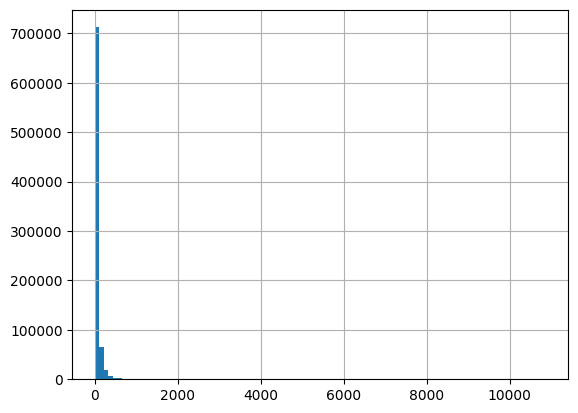

In [ ]:
data.n_tokens.hist(bins = 100)

We see that we have some extremely long texts. Let's look at the largest one

In [ ]:
# this one has a very long series of "L,"
print(data[data.n_tokens > 10000].text.values[0])

My sample includes subjects, of which belong to group L , while the other to group L please see data below . I used GLM for a binary outcome to test for group differences in background variables - summary pre lt - glm L g a m p e, family binomial logit , data df ...yielding significant differences for of them g, a, m, p, and e . So I modeled these background variables as covariates when testing for an association between my predictor, chr and my outcome rsk , in each one of the groups L , L , again using GLM for binary outcome summary fit lt - glm rsk chr g a m p e, family binomial logit , data df which df L , The results showed that a significant association does exist for L but not for L . I would appreciate your help in how to test whether significance non-significance can be attributed to the group condition? . Or in other words, is it true that for subjects L , a significant correlation is evident, while for L ' it's absent. Thanks for responders! Uri structure list L c , , , , , 

We can see that most of the longest texts are composed of tables with limited semantic value.
We will remove rows that have more than an arbitrary number of tokens (let's say 5000) as well as rows that have too few tokens.

In [ ]:
data = data[(data.n_tokens > 4) & (data.n_tokens < 5000)].reset_index(drop = True)
data.shape

(789649, 7)

In [ ]:
data.category.value_counts()

,count
category,
comment,540582
post,165382
title,83685


# Export data
We could export the dataframe as such using a pickle file format.

However if we want to keep the original csv format it's going to be easier if we transform the list of tokens into a space separated string.

On retrieval we will only have to split the string to get back the list of tokens.

In [ ]:
data['tokens'] = data.tokens.apply(lambda tk : ' '.join(tk))
data.tokens.head()

0    the condition makes the gradient unbiased . it...
1                       yes , that sounds fine to me .
2    consider gaussian variables belonging to a gau...
3    thanks s . catterall . - integrability i knew ...
4                 feature with very few extreme values
Name: tokens, dtype: object

And finally let's export the dataframe into a csv file.
We will use that csv file as the new cleaned up and filtered out dataset to build our language model in task 2.


In [ ]:
data.to_csv('stackexchange_812k.tokenized.csv', quoting = csv.QUOTE_ALL, index = False)


# Conclusion
Removing or adding steps to this first text processing task will allow us to test different approaches in our language model building process.

For instance we can decide not to remove the latex formatted mathematical equation and see if the language model is able to create grammatically valid equations.

We could also implement a step to handle contractions (i'm, let's, ...) and see if that improves the quality of the generated text

Finally we could also decide to work on the vocabulary and filter out typos or non-English unknown words using named entity recognition to tag specific tokens.


